Steady state heat equation
======

This notebook will setup and solve the steady state heat equation:

\\[
\nabla(k\nabla)T = h
\\]

where $k$ is the diffusivity, T the temperature field and $h$ the source term.

**Keywords:** initial conditions, boundary conditions, heat equation

In [1]:
import underworld as uw
import glucifer

Setup parameters
-----

In [2]:
# Set box size.
boxHeight = 1.0
boxLength = 2.0
# Set the resolution.
resx = 16
resy = 8

Create mesh and variables
------

In [3]:
mesh = uw.mesh.FeMesh_Cartesian( elementType = ("Q1/dQ0"), 
                                 elementRes  = (resx, resy), 
                                 minCoord    = (0., 0.), 
                                 maxCoord    = (boxLength, boxHeight))


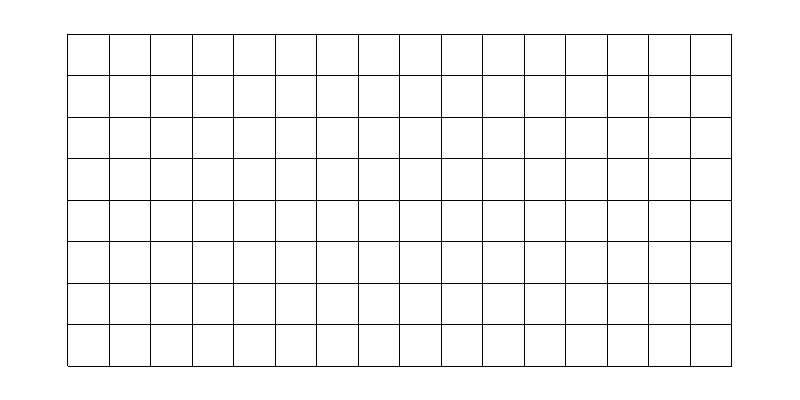

In [4]:
# gLucifer visualisation of mesh
fig = glucifer.Figure( figsize=(800,400) )
fig.append(glucifer.objects.Mesh( mesh ))
fig.show()

In [5]:
# Create mesh variables for the temperature field & initialise. 
temperatureField = uw.mesh.MeshVariable( mesh=mesh, nodeDofCount=1 )
temperatureField.data[:] = 0.

Create boundary conditions
----------

We first wish to determine which vertices will be flagged as boundary conditions. To do this, we create set objects which contain the vertex indices for which the condition will apply. The *specialSets* dictionary (on the mesh object) contains the sets we usually require. Note however that you may construct sets which contain indices for **any** vertex on the mesh.

In [6]:
mesh.specialSets.keys()

dict_keys(['MaxI_VertexSet', 'MinI_VertexSet', 'MaxJ_VertexSet', 'MinJ_VertexSet', 'AllWalls_VertexSet', 'Empty'])

The vertices along the bottom wall is given by  'MinJ_VertexSet', the top wall given by the 'MaxJ_VertexSet'.

Construct sets for the horizontal walls:

In [7]:
jWalls = mesh.specialSets["MinJ_VertexSet"] + mesh.specialSets["MaxJ_VertexSet"]

Create Dirichlet boundary conditions for the `jWalls` and provide values.

In [8]:
tempBC = uw.conditions.DirichletCondition( variable=temperatureField, indexSetsPerDof=(jWalls,) )

In [9]:
# set bottom wall temperature bc
for index in mesh.specialSets["MinJ_VertexSet"]:
    temperatureField.data[index] = 1.0
# set top wall temperature bc
for index in mesh.specialSets["MaxJ_VertexSet"]:
    temperatureField.data[index] = 0.0


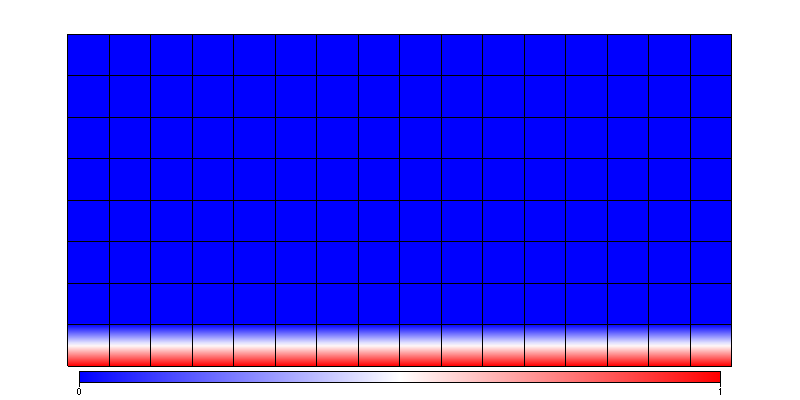

In [10]:
# gLucifer visualisation of temperature field & mesh
fig.append( glucifer.objects.Surface( mesh, temperatureField, colours="blue white red" ) )
fig.show()

Heat Equation System setup & solve
-----

Temperature field, diffusivity and boundary conditions are passed to the SteadyStateHeat system function.

In [11]:
heatequation = uw.systems.SteadyStateHeat(temperatureField = temperatureField, 
                                            fn_diffusivity = 1.0, 
                                                conditions = tempBC)

Solve the heat equation.

In [12]:
# get the default heat equation solver
heatsolver = uw.systems.Solver(heatequation)
# solve
heatsolver.solve()


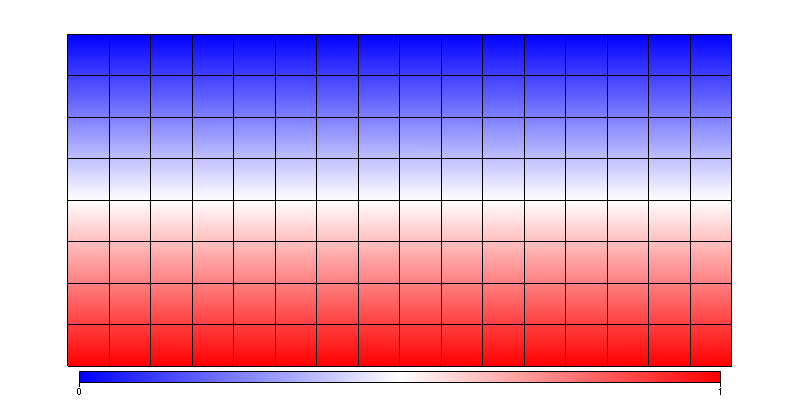

In [13]:
# gLucifer visualisation of temperature field & mesh
fig.show()